#**Logistic Regression**
on **HR Analytics Case Study** dataset from Kaggle

Date: 10 November 2022

Team ID: PNT2022TMID27015

Project Name: Corporate Employee Attrition Analytics

##Uploading the Dataset

In [1]:
import numpy as np
import pandas as pd

In [3]:
data1=pd.read_csv("/content/general_data.csv")
data2=pd.read_csv("/content/employee_survey_data.csv")
data3=pd.read_csv("/content/manager_survey_data.csv")

##Merging the Dataset

In [4]:
output = pd.merge(data1, data2, on='EmployeeID', how='outer')
output1 = pd.merge(output, data3, on='EmployeeID', how='outer')
output1

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,42,No,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


In [5]:
df=output1.copy()
replace_map={'Attrition':{'Yes':1,'No':0}}
df.replace(replace_map,inplace=True)
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,0,Travel_Rarely,Research & Development,5,4,Medical,1,4406,Female,...,10.0,5,3,0,2,4.0,1.0,3.0,3,3
4406,29,0,Travel_Rarely,Research & Development,2,4,Medical,1,4407,Male,...,10.0,2,3,0,2,4.0,4.0,3.0,2,3
4407,25,0,Travel_Rarely,Research & Development,25,2,Life Sciences,1,4408,Male,...,5.0,4,4,1,2,1.0,3.0,3.0,3,4
4408,42,0,Travel_Rarely,Sales,18,2,Medical,1,4409,Male,...,10.0,2,9,7,8,4.0,1.0,3.0,2,3


##Univariate Analysis

In [6]:
print('This dataset has {} observations with {} features.'.format(output1.shape[0],output1.shape[1]))

This dataset has 4410 observations with 29 features.


In [7]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0e80b2edd0>,
      dtype=object)

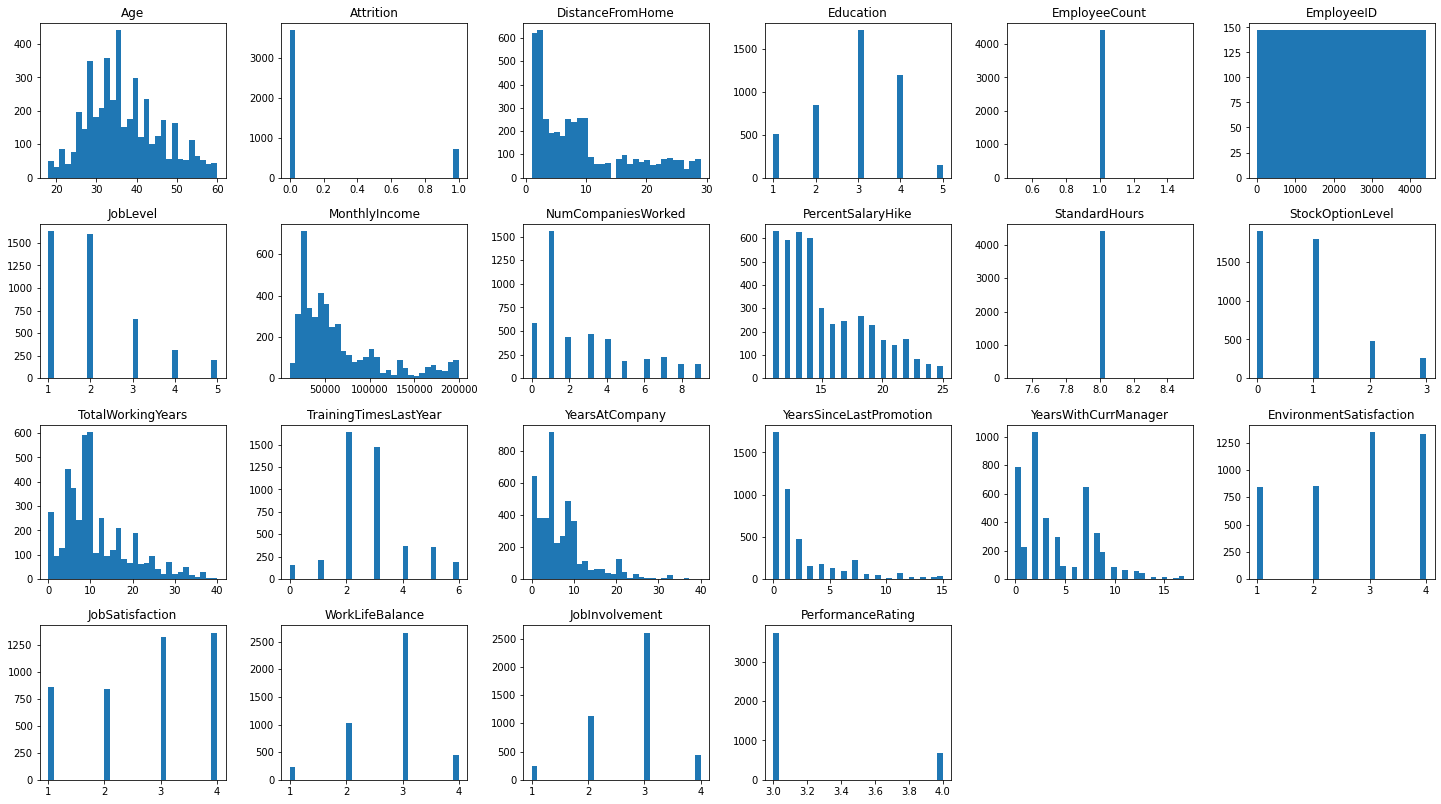

In [8]:
df.hist(figsize=(25,25), grid=False, layout=(7,6), bins = 30)

In [ ]:
numerical_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=[np.object]).columns

In [14]:
datax=numerical_features.to_frame()
datax.index.name='Numerical_Features'
datax

,0
Numerical_Features,
Age,Age
Attrition,Attrition
DistanceFromHome,DistanceFromHome
Education,Education
EmployeeCount,EmployeeCount
EmployeeID,EmployeeID
JobLevel,JobLevel
MonthlyIncome,MonthlyIncome
NumCompaniesWorked,NumCompaniesWorked


In [11]:
datay=categorical_features.to_frame()
datay.index.name='Categorical_Features'
datay

,0
Categorical_Features,
BusinessTravel,BusinessTravel
Department,Department
EducationField,EducationField
Gender,Gender
JobRole,JobRole
MaritalStatus,MaritalStatus
Over18,Over18


In [16]:
df.dtypes

Age                          int64
Attrition                    int64
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
EnvironmentSatisfaction    float64
JobSatisfaction            float64
WorkLifeBalance            float64
JobInvolvement               int64
PerformanceRating   

##Statistical Description

In [17]:
df.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
count,4410.000000,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,...,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000,4410.000000,4410.000000
mean,36.923810,0.161224,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,...,11.279936,2.799320,7.008163,2.187755,4.123129,2.723603,2.728246,2.761436,2.729932,3.153741
std,9.133301,0.367780,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,...,7.782222,1.288978,6.125135,3.221699,3.567327,1.092756,1.101253,0.706245,0.711400,0.360742
min,18.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000
25%,30.000000,0.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,...,6.000000,2.000000,3.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
50%,36.000000,0.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,...,10.000000,3.000000,5.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,0.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,...,15.000000,3.000000,9.000000,3.000000,7.000000,4.000000,4.000000,3.000000,3.000000,3.000000
max,60.000000,1.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,...,40.000000,6.000000,40.000000,15.000000,17.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [18]:
df.describe(include=['object'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18
count,4410,4410,4410,4410,4410,4410,4410
unique,3,3,6,2,9,3,1
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y
freq,3129,2883,1818,2646,978,2019,4410


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   int64  
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

##Replacing the Missing values

In [20]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [21]:
for col in df[['TotalWorkingYears','NumCompaniesWorked','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance']]:
  mean=df[col].mean()
  df[col]=df[col].fillna(mean)

In [22]:
df.isnull().sum().sum()

0

##Identifying the Outliers and replacing them

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

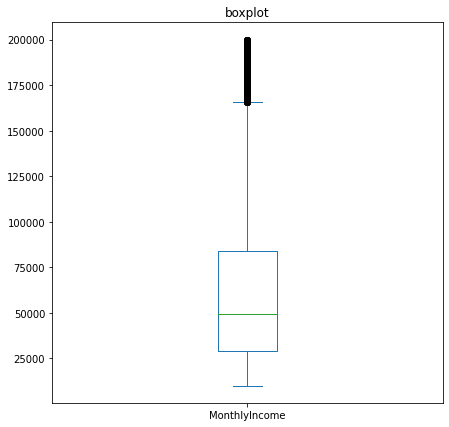

In [26]:
plt.rcParams["figure.figsize"] = [7, 7]
ax = df['MonthlyIncome'].plot(kind='box', title='boxplot')

In [27]:
Q1 = output1['MonthlyIncome'].quantile(0.25)
Q3 = output1['MonthlyIncome'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 - (whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
output1['MonthlyIncome'] = np.where(output1['MonthlyIncome']>upper_whisker,upper_whisker,np.where(output1['MonthlyIncome']<lower_whisker,lower_whisker,output1['MonthlyIncome']))

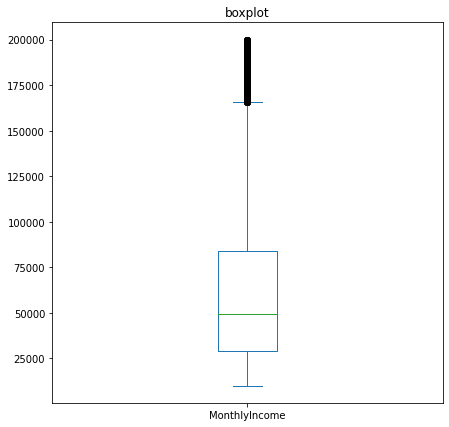

In [28]:
plt.rcParams["figure.figsize"] = [7, 7]
ay = df['MonthlyIncome'].plot(kind='box', title='boxplot')

##Splitting into dependent and independent variables

In [29]:
df.corr()['Attrition']

Age                       -0.159205
Attrition                  1.000000
DistanceFromHome          -0.009730
Education                 -0.015111
EmployeeCount                   NaN
EmployeeID                -0.004729
JobLevel                  -0.010290
MonthlyIncome             -0.031176
NumCompaniesWorked         0.042232
PercentSalaryHike          0.032533
StandardHours                   NaN
StockOptionLevel          -0.006839
TotalWorkingYears         -0.170111
TrainingTimesLastYear     -0.049431
YearsAtCompany            -0.134392
YearsSinceLastPromotion   -0.033019
YearsWithCurrManager      -0.156199
EnvironmentSatisfaction   -0.101795
JobSatisfaction           -0.102743
WorkLifeBalance           -0.062561
JobInvolvement            -0.015588
PerformanceRating          0.023403
Name: Attrition, dtype: float64

In [30]:
# Choosing only the highly correlated columns for x
x=df[['Age','TotalWorkingYears','YearsAtCompany','YearsWithCurrManager','EnvironmentSatisfaction','JobSatisfaction']]
x

,Age,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction
0,51,1.000000,1,0,3.0,4.0
1,31,6.000000,5,4,3.0,2.0
2,32,5.000000,5,3,2.0,2.0
3,38,13.000000,8,5,4.0,4.0
4,32,9.000000,6,4,4.0,1.0
...,...,...,...,...,...,...
4405,42,10.000000,3,2,4.0,1.0
4406,29,10.000000,3,2,4.0,4.0
4407,25,5.000000,4,2,1.0,3.0
4408,42,10.000000,9,8,4.0,1.0


In [31]:
y=df['Attrition']
y

0       0
1       1
2       0
3       0
4       0
       ..
4405    0
4406    0
4407    0
4408    0
4409    0
Name: Attrition, Length: 4410, dtype: int64

In [32]:
x.shape, y.shape

((4410, 6), (4410,))

##Splitting the data into test and train

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [44]:
x_train.shape,x_test.shape

((3528, 6), (882, 6))

In [45]:
y_train.shape,y_test.shape

((3528,), (882,))

##Building the model

In [46]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [47]:
y_pred=model.predict(x_test)

##Measuring the performance using Metrics

In [48]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[753,   0],
       [128,   1]])

In [49]:
print('R Squared value:', r2_score(y_test,y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test,y_pred))
print('Mean Squared Error:', mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test,y_pred)))

R Squared value: -0.16223478180302076
Mean Absolute Error: 0.14512471655328799
Mean Squared Error: 0.14512471655328799
Root Mean Squared Error: 0.38095238095238093
